# Check energy distribution for each molecule

Exclude molecules with high energy from energy minimum structure. Thershold is 0.1 hartee (62.75 kcal/mol).

In [1]:
import os, sys, math
import numpy as np
import pandas as pd
from openff.toolkit.topology import Molecule
import qcportal as ptl
from collections import Counter

In [2]:
HARTEE_TO_KCALPERMOL = 627.5

In [3]:
client =ptl.FractalClient()
ds = client.get_collection("Dataset", "RNA Single Point Dataset v1.0")

In [4]:
#recs_wb97m = ds.get_records(method='wb97m-d3bj', basis='def2-tzvppd', program='psi4', keywords='wb97m-d3bj/def2-tzvppd')
#print("No. of records: ", len(recs_wb97m))

In [5]:
recs_default = ds.get_records(method='b3lyp-d3bj', basis='dzvp', program='psi4', keywords='default')
print("length of dataframe", len(recs_default), "\n", "No. of records in each: ",  len(recs_default[0]), len(recs_default[1]))

length of dataframe 2 
 No. of records in each:  4489 4489


In [32]:
count = 0
mydata = []

# Combining two energies
# Some calculations failed due to SCF convergence errors, so excluding those by checking the record status of b3lyp calculation
for i in range(len(recs_default[0])):
    if recs_default[1].iloc[i].record.status == 'COMPLETE':
        print(count, " B3LYP + D3BJ energy of ", recs_default[1].iloc[i].name, recs_default[1].iloc[i].record.properties.return_energy + recs_default[0].iloc[i].record.properties.return_energy)
   

        record_id = recs_default[1].iloc[i].record.id
        mol_id = recs_default[1].iloc[i].record.molecule
        energy = recs_default[1].iloc[i].record.properties.return_energy + recs_default[0].iloc[i].record.properties.return_energy

        
        # get smiles
        record_name = recs_default[1].iloc[i].name
        _smi = record_name.split('-')
        if len(_smi) == 1:
            smi = _smi[0]
        else:
            smi = "".join(_smi[:-1])


        # check conformers
        try:
            conf_id = record_name.split('-')[-1]
        except:
            conf_id = 0


        # name and formula
        #name = client.query_molecules(recs_default[1].iloc[-i].record.molecule)[0].name
        #formula = client.query_molecules(recs_default[1].iloc[-i].record.molecule)[0].get_molecular_formula()

        
        # define nucleotide type
        nb = [ s for s in smi if s == "." ]
        if len(nb) == 0:
            nbtype = "trinucleotide"
        elif len(nb) == 1:
            nbtype = "base pair"
        elif len(nb) == 2:
            nbtype = "base triple"
        else:
            print("unknown base type")

            
        mydata.append([record_id, mol_id, smi, conf_id, energy, nbtype])

        
        count += 1

0  B3LYP + D3BJ energy of  Nc1ccn([C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)c(=O)n1.Nc1ccn([C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)c(=O)n1-0 -1782.639713836192
1  B3LYP + D3BJ energy of  Nc1ccn([C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)c(=O)n1.Nc1ccn([C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)c(=O)n1-1 -1782.6302990214972
2  B3LYP + D3BJ energy of  Nc1ccn([C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)c(=O)n1.Nc1ccn([C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)c(=O)n1-2 -1782.641790205362
3  B3LYP + D3BJ energy of  Nc1ccn([C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)c(=O)n1.Nc1ccn([C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)c(=O)n1-3 -1782.62233649516
4  B3LYP + D3BJ energy of  Nc1ccn([C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)c(=O)n1.Nc1ccn([C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)c(=O)n1-4 -1782.648962953126
5  B3LYP + D3BJ energy of  Nc1ccn([C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)c(=O)n1.Nc1ccn([C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)c(=O)n1-5 -1782.6406730116719
6  B3LYP + D3BJ energy of  Nc1ccn([C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)c(=O)n1.Nc1ccn([C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)c(=O)n

In [33]:
cols = ["RECORDID", "MOLID", "SMILES", "CONFID", "ENERGY", "TYPE"]
df = pd.DataFrame(mydata, columns=cols)

In [34]:
df

,RECORDID,MOLID,SMILES,CONFID,ENERGY,TYPE
0,109522131,102478519,Nc1ccn([C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)c(=O)...,0,-1782.639714,base pair
1,109522262,102478520,Nc1ccn([C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)c(=O)...,1,-1782.630299,base pair
2,109522115,102478521,Nc1ccn([C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)c(=O)...,2,-1782.641790,base pair
3,109522209,102478522,Nc1ccn([C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)c(=O)...,3,-1782.622336,base pair
4,109522302,102478523,Nc1ccn([C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)c(=O)...,4,-1782.648963,base pair
...,...,...,...,...,...,...
4376,109520666,102477790,O=c1ccn([C@@H]2O[C@H](COP(=O)([O])O[C@@H]3[C@@...,73,-3715.220660,trinucleotide
4377,109520669,102477791,O=c1ccn([C@@H]2O[C@H](COP(=O)([O])O[C@@H]3[C@@...,74,-3715.216407,trinucleotide
4378,109520695,102477792,O=c1ccn([C@@H]2O[C@H](COP(=O)([O])O[C@@H]3[C@@...,75,-3715.197436,trinucleotide
4379,109520672,102477725,O=c1ccn([C@@H]2O[C@H](COP(=O)([O])O[C@@H]3[C@@...,8,-3715.204625,trinucleotide


check if number of unique molecules matches original qca submission https://github.com/openforcefield/qca-dataset-submission/tree/master/submissions/2022-07-07-RNA-basepair-triplebase-single-points

In [35]:
assert len(df.SMILES.unique()) == 94

In [36]:
mylist = df.SMILES.unique().tolist()
mylist

['Nc1ccn([C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)c(=O)n1.Nc1ccn([C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)c(=O)n1',
 'Nc1ccn([C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)c(=O)n1.Nc1ccn([C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)c(=O)n1.Nc1ccn([C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)c(=O)n1',
 'Nc1ccn([C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)c(=O)n1.Nc1ccn([C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)c(=O)n1.Nc1nc2c(ncn2[C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)c(=O)[nH]1',
 'Nc1ccn([C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)c(=O)n1.Nc1ccn([C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)c(=O)n1.Nc1ncnc2c1ncn2[C@@H]1O[C@H](CO)[C@@H](O)[C@H]1O',
 'Nc1ccn([C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)c(=O)n1.Nc1ccn([C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)c(=O)n1.O=c1ccn([C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)c(=O)[nH]1',
 'Nc1ccn([C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)c(=O)n1.Nc1nc2c(ncn2[C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)c(=O)[nH]1',
 'Nc1ccn([C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)c(=O)n1.Nc1nc2c(ncn2[C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)c(=O)[nH]1.Nc1nc2c(ncn2[C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)c(=O)[nH]1',
 'Nc1c

In [37]:
# loop over each unique molecule (smiles) and calculate relative energy respect to minima
uid = 0
for s in mylist:
    #print(s)
    _df = df[df["SMILES"] == s]
    
    n_conf = len(_df)
    arr = _df.ENERGY.to_numpy() - _df.ENERGY.to_numpy().min()   # hartee

    #idx = np.where(arr > 1)
    #if len(idx[0]) != 0:
    #    print("{}: {} hartee relative to minima structure".format(s, arr[idx]))

    
    # get row index
    for i, idx in enumerate(_df.index):
        df.loc[idx, "N_CONF"] = n_conf
        df.loc[idx, "RELATIVE_ENERGY_HARTEE"] = arr[i]
        df.loc[idx, "RELATIVE_ENERGY_KCALPERMOL"] = arr[i] * HARTEE_TO_KCALPERMOL
        df.loc[idx, "UID"] = uid
        
    uid += 1

In [38]:
df

,RECORDID,MOLID,SMILES,CONFID,ENERGY,TYPE,N_CONF,RELATIVE_ENERGY_HARTEE,RELATIVE_ENERGY_KCALPERMOL,UID
0,109522131,102478519,Nc1ccn([C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)c(=O)...,0,-1782.639714,base pair,9.0,0.009249,5.803821,0.0
1,109522262,102478520,Nc1ccn([C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)c(=O)...,1,-1782.630299,base pair,9.0,0.018664,11.711617,0.0
2,109522115,102478521,Nc1ccn([C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)c(=O)...,2,-1782.641790,base pair,9.0,0.007173,4.500899,0.0
3,109522209,102478522,Nc1ccn([C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)c(=O)...,3,-1782.622336,base pair,9.0,0.026626,16.708102,0.0
4,109522302,102478523,Nc1ccn([C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)c(=O)...,4,-1782.648963,base pair,9.0,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...
4376,109520666,102477790,O=c1ccn([C@@H]2O[C@H](COP(=O)([O])O[C@@H]3[C@@...,73,-3715.220660,trinucleotide,76.0,0.029826,18.715976,93.0
4377,109520669,102477791,O=c1ccn([C@@H]2O[C@H](COP(=O)([O])O[C@@H]3[C@@...,74,-3715.216407,trinucleotide,76.0,0.034079,21.384686,93.0
4378,109520695,102477792,O=c1ccn([C@@H]2O[C@H](COP(=O)([O])O[C@@H]3[C@@...,75,-3715.197436,trinucleotide,76.0,0.053050,33.288600,93.0
4379,109520672,102477725,O=c1ccn([C@@H]2O[C@H](COP(=O)([O])O[C@@H]3[C@@...,8,-3715.204625,trinucleotide,76.0,0.045860,28.777461,93.0


In [40]:
df.sort_values(by=['SMILES', 'RELATIVE_ENERGY_HARTEE'])

,RECORDID,MOLID,SMILES,CONFID,ENERGY,TYPE,N_CONF,RELATIVE_ENERGY_HARTEE,RELATIVE_ENERGY_KCALPERMOL,UID
4,109522302,102478523,Nc1ccn([C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)c(=O)...,4,-1782.648963,base pair,9.0,0.000000,0.000000,0.0
2,109522115,102478521,Nc1ccn([C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)c(=O)...,2,-1782.641790,base pair,9.0,0.007173,4.500899,0.0
5,109522167,102478524,Nc1ccn([C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)c(=O)...,5,-1782.640673,base pair,9.0,0.008290,5.201938,0.0
0,109522131,102478519,Nc1ccn([C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)c(=O)...,0,-1782.639714,base pair,9.0,0.009249,5.803821,0.0
6,109522304,102478525,Nc1ccn([C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)c(=O)...,6,-1782.639590,base pair,9.0,0.009373,5.881839,0.0
...,...,...,...,...,...,...,...,...,...,...
4373,109520535,102477787,O=c1ccn([C@@H]2O[C@H](COP(=O)([O])O[C@@H]3[C@@...,70,-3715.149320,trinucleotide,76.0,0.101166,63.481547,93.0
4309,109520708,102477729,O=c1ccn([C@@H]2O[C@H](COP(=O)([O])O[C@@H]3[C@@...,12,-3715.144137,trinucleotide,76.0,0.106349,66.734115,93.0
4332,109520628,102477750,O=c1ccn([C@@H]2O[C@H](COP(=O)([O])O[C@@H]3[C@@...,33,-3715.142594,trinucleotide,76.0,0.107891,67.701858,93.0
4349,109520567,102477766,O=c1ccn([C@@H]2O[C@H](COP(=O)([O])O[C@@H]3[C@@...,49,-3715.126673,trinucleotide,76.0,0.123813,77.692800,93.0


In [42]:
df[df["RELATIVE_ENERGY_HARTEE"] > 1]

,RECORDID,MOLID,SMILES,CONFID,ENERGY,TYPE,N_CONF,RELATIVE_ENERGY_HARTEE,RELATIVE_ENERGY_KCALPERMOL,UID
13,109522573,102478633,Nc1ccn([C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)c(=O)...,16,-2815.359038,base triple,11.0,6.307843,3958.171476,2.0
19,109522625,102478625,Nc1ccn([C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)c(=O)...,8,-2813.786549,base triple,11.0,7.880332,4944.908623,2.0
20,109522609,102478626,Nc1ccn([C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)c(=O)...,9,-2815.451005,base triple,11.0,6.215876,3900.462036,2.0
23,109522860,102478858,Nc1ccn([C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)c(=O)...,10,-2740.686506,base triple,9.0,5.696453,3574.524329,3.0
26,109522875,102478852,Nc1ccn([C@@H]2O[C@H](CO)[C@@H](O)[C@H]2O)c(=O)...,4,-2739.828865,base triple,9.0,6.554094,4112.693817,3.0
...,...,...,...,...,...,...,...,...,...,...
3672,109522283,102478550,Nc1ncnc2c1ncn2[C@@H]1O[C@H](CO)[C@@H](O)[C@H]1...,3,-1870.611054,base pair,15.0,4.341219,2724.114974,82.0
3674,109522146,102478552,Nc1ncnc2c1ncn2[C@@H]1O[C@H](CO)[C@@H](O)[C@H]1...,5,-1870.567036,base pair,15.0,4.385237,2751.736440,82.0
3679,109522641,102478701,Nc1ncnc2c1ncn2[C@@H]1O[C@H](CO)[C@@H](O)[C@H]1...,12,-2778.864181,base triple,4.0,7.285584,4571.703852,83.0
3680,109522639,102478706,Nc1ncnc2c1ncn2[C@@H]1O[C@H](CO)[C@@H](O)[C@H]1...,17,-2778.973504,base triple,4.0,7.176261,4503.103879,83.0


In [48]:
df.RELATIVE_ENERGY_HARTEE.max()

8.860008632659174

/var/folders/4w/d4mqk6kx5js1ycjth49ps228ljmkky/T/ipykernel_57689/18661527.py:29: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(np.arange(0, df.RELATIVE_ENERGY_HARTEE.max()), fontsize=28)


Text(0, 0.5, 'Relative energy [hartee]')

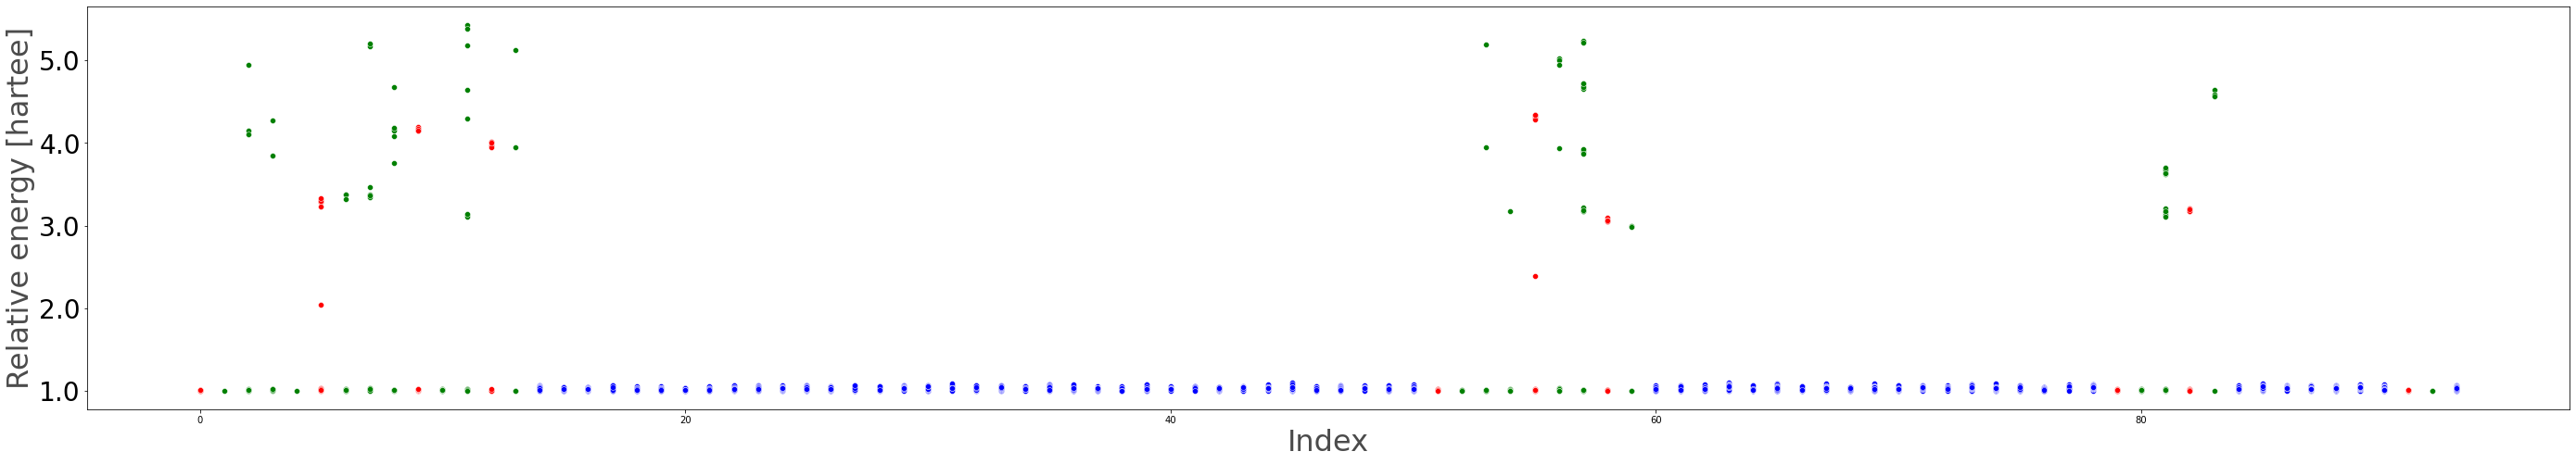

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt
#sns.set(style="whitegrid")




f, ax = plt.subplots(figsize=(48, 8))
# Show each distribution with both violins and points
#sns.violinplot(x="feed",y="weight",data=df, inner="box", palette="Set3", cut=2, linewidth=3)
#sns.violinplot(data=dataset, x="UID", y="RELATIVE_ENERGY")

dataset = df[df["TYPE"] == "trinucleotide"]
sns.scatterplot(data=dataset, x="UID", y="RELATIVE_ENERGY_HARTEE", color="blue")


dataset = df[df["TYPE"] == "base pair"]
sns.scatterplot(data=dataset, x="UID", y="RELATIVE_ENERGY_HARTEE", color="red")


dataset = df[df["TYPE"] == "base triple"]
sns.scatterplot(data=dataset, x="UID", y="RELATIVE_ENERGY_HARTEE", color="green")

#sns.despine(left=True)

#f.suptitle('Chick weights by feed type', fontsize=18, fontweight='bold')
#ax.set_xlim(np.arange(0, uid))
#ax.set_xticklabels(np.arange(0, uid), fontsize=28)
ax.set_yticklabels(np.arange(0, df.RELATIVE_ENERGY_HARTEE.max()), fontsize=28)
#ax.set_yticks(np.arange(0, df.RELATIVE_ENERGY_HARTEE.max()))
ax.set_xlabel("Index",size=32,alpha=0.7)
ax.set_ylabel("Relative energy [hartee]",size=32,alpha=0.7)

#ax.set_yscale("log")

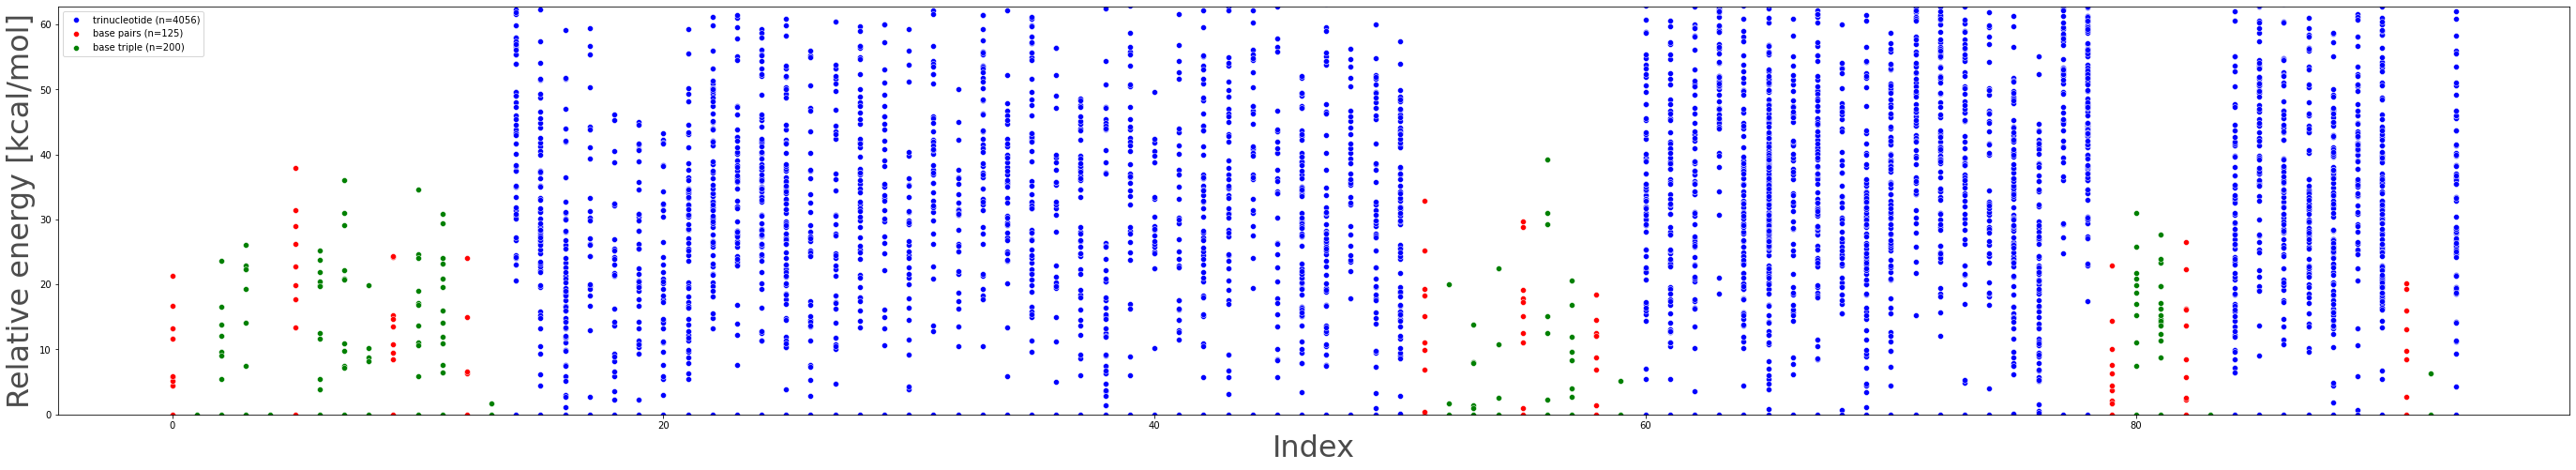

In [78]:
f, ax = plt.subplots(figsize=(48, 8))
# Show each distribution with both violins and points
#sns.violinplot(x="feed",y="weight",data=df, inner="box", palette="Set3", cut=2, linewidth=3)
#sns.violinplot(data=dataset, x="UID", y="RELATIVE_ENERGY")

dataset = df[df["TYPE"] == "trinucleotide"]
sns.scatterplot(data=dataset, x="UID", y="RELATIVE_ENERGY_KCALPERMOL", color="blue", label="trinucleotide (n={})".format(len(dataset)))


dataset = df[df["TYPE"] == "base pair"]
sns.scatterplot(data=dataset, x="UID", y="RELATIVE_ENERGY_KCALPERMOL", color="red", label="base pairs (n={})".format(len(dataset)))


dataset = df[df["TYPE"] == "base triple"]
sns.scatterplot(data=dataset, x="UID", y="RELATIVE_ENERGY_KCALPERMOL", color="green", label="base triple (n={})".format(len(dataset)))


#f.suptitle('Chick weights by feed type', fontsize=18, fontweight='bold')
#ax.set_xticklabels(np.arange(0, uid), fontsize=28)
#ax.set_yticklabels(np.arange(0, df.RELATIVE_ENERGY_KCALPERMOL.max()), fontsize=28)
ax.set_ylim(0, HARTEE_TO_KCALPERMOL/10)
ax.set_xlabel("Index",size=32,alpha=0.7)
ax.set_ylabel("Relative energy [kcal/mol]",size=32,alpha=0.7)
plt.legend()

#ax.set_yscale("log")

In [72]:
df.RELATIVE_ENERGY_KCALPERMOL.max()

5559.655416993632